In [12]:
import pandas as pd
import numpy as np
import re
import string
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

In [13]:
data = pd.read_csv("data_capec.csv")
data['text'] = data["text"].str.replace('/',' ')
X = data["text"]
y = data["label"]

# Tiền xử lý dữ liệu
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X, maxlen=100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng mô hình

In [14]:
rlist =['66 - SQL Injection', '000 - Normal','194 - Fake the Source of Data','34 - HTTP Response Splitting',
'126 - Path Traversal',
'242 - Code Injection',
'272 - Protocol Manipulation',
'310 - Scanning for Vulnerable Software',
'153 - Input Data Manipulation']
mapping = {l: i for i, l in enumerate(rlist)}
y_train = [mapping[s] for s in y_train] 
y_test = [mapping[r] for r in y_test] 

In [15]:
model = MLPClassifier(random_state=1, max_iter=20, verbose=True, device ='gpu')
model.fit(X_train, y_train)


Iteration 1, loss = 4.42032672
Iteration 2, loss = 2.00241729
Iteration 3, loss = 1.54665885
Iteration 4, loss = 1.30425449
Iteration 5, loss = 1.18748444
Iteration 6, loss = 1.08867230
Iteration 7, loss = 1.01612859
Iteration 8, loss = 0.97328382
Iteration 9, loss = 0.93379769
Iteration 10, loss = 0.89963447
Iteration 11, loss = 0.88098392
Iteration 12, loss = 0.86383420
Iteration 13, loss = 0.84542488
Iteration 14, loss = 0.83433520
Iteration 15, loss = 0.82267861
Iteration 16, loss = 0.81206416
Iteration 17, loss = 0.81124375
Iteration 18, loss = 0.79825933
Iteration 19, loss = 0.79249368
Iteration 20, loss = 0.78515160


c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(max_iter=20, random_state=1, verbose=True)

In [17]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

(72562,)

In [21]:
print(classification_report(y_test, y_pred, target_names=rlist, labels= range(10)))

                                        precision    recall  f1-score   support

                    66 - SQL Injection       0.72      0.80      0.76     36682
                          000 - Normal       0.55      0.56      0.56     17959
         194 - Fake the Source of Data       0.76      0.53      0.63      8644
          34 - HTTP Response Splitting       0.92      0.78      0.84      3708
                  126 - Path Traversal       0.78      0.68      0.73      2312
                  242 - Code Injection       0.97      0.80      0.88      1969
                                 Error       0.00      0.00      0.00         0
           272 - Protocol Manipulation       0.28      0.03      0.05       584
310 - Scanning for Vulnerable Software       0.72      0.71      0.71       485
         153 - Input Data Manipulation       0.29      0.29      0.29       219

                             micro avg       0.70      0.70      0.70     72562
                             macro avg

c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

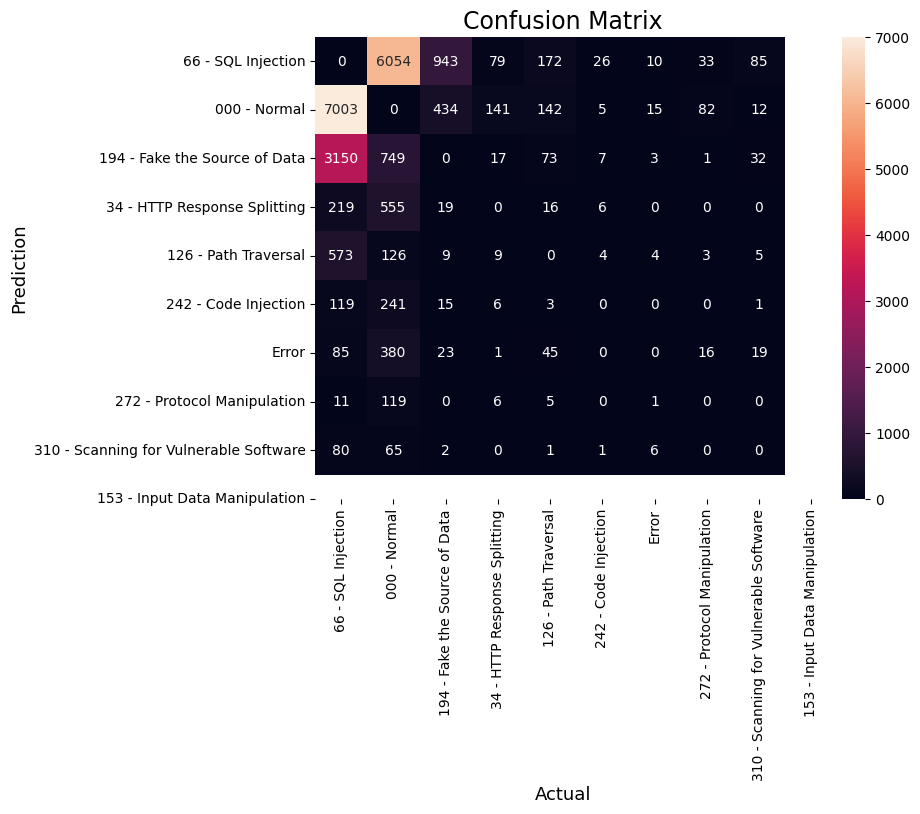

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
np.fill_diagonal(cm,0)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

sns.heatmap(cm,
            annot=True,
            fmt='g', xticklabels=rlist, yticklabels= rlist)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

plt.show()